# GARCH Stock Forecasting¶


Read Data

In [190]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from arch.univariate import GARCH
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from numpy import mean
from numpy import cov
import warnings
warnings.filterwarnings('ignore')

Symbol Volatility

In [115]:
start = datetime(1970, 2, 1)
end = datetime(2021, 4, 2)

In [116]:
SYM = web.DataReader('^IXIC', 'yahoo', start=start, end=end)

In [158]:
SYMreturns = 100 * SYM.Close.pct_change().dropna()
#mean(SYMreturns)

Text(0.5, 1.0, 'SYM Returns')

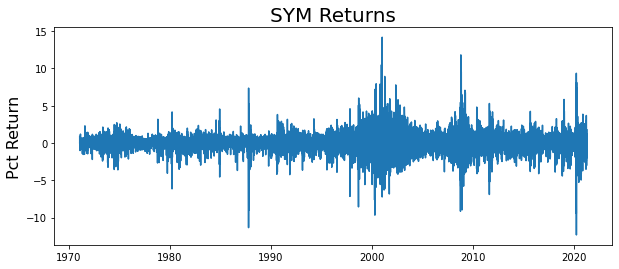

In [160]:
plt.figure(figsize=(10,4))
plt.plot(SYMreturns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SYM Returns', fontsize=20)

# PACF

In [161]:
#plot_pacf(SYMreturns)
#plt.show()

# Fit GARCH

In [232]:
model = arch_model(SYMreturns, vol = 'HARCH', p = 5, q = 5, mean = "constant", dist = "Normal")
#garch = GARCH(SYMreturns, p = 1, q = 1)

In [224]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 146117.91632215216
Iteration:      2,   Func. Count:     24,   Neg. LLF: 30374.30119104951
Iteration:      3,   Func. Count:     37,   Neg. LLF: 17558.54631731774
Iteration:      4,   Func. Count:     45,   Neg. LLF: 17672.831070847344
Iteration:      5,   Func. Count:     54,   Neg. LLF: 23071.482156631664
Iteration:      6,   Func. Count:     63,   Neg. LLF: 24137.437789600102
Iteration:      7,   Func. Count:     73,   Neg. LLF: 17770.756618983927
Iteration:      8,   Func. Count:     82,   Neg. LLF: 17557.72822695262
Iteration:      9,   Func. Count:     91,   Neg. LLF: 17529.483013077574
Iteration:     10,   Func. Count:     99,   Neg. LLF: 17529.10863375132
Iteration:     11,   Func. Count:    107,   Neg. LLF: 17529.099292675986
Iteration:     12,   Func. Count:    115,   Neg. LLF: 17529.096717745524
Iteration:     13,   Func. Count:    123,   Neg. LLF: 17529.09588210415
Iteration:     14,   Func. Count:    131,   Neg. LLF: 17

In [225]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - HARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      HARCH   Log-Likelihood:               -17529.1
Distribution:                  Normal   AIC:                           35072.2
Method:            Maximum Likelihood   BIC:                           35124.3
                                        No. Observations:                12649
Date:                Sun, Apr 04 2021   Df Residuals:                    12648
Time:                        16:44:21   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0870  8.339e-03     10.435  1.709e-25 [7.067e-02,  0.103]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.2572  1.408e-02     18.266  1.535e-74      [  0.230,  0.285]
alpha[1]       0.0124  2.533e-02      0.490      0.624 [-3.723e-02,6.208e-02]
alpha[2]   2.9526e-13  5.027e-02  5.873e-12      1.000 [-9.853e-02,9.853e-02]
alpha[3]   2.8485e-13  7.378e-02  3.861e-12      1.000      [ -0.145,  0.145]
alpha[4]       0.0576  9.361e-02      0.616      0.538      [ -0.126,  0.241]
alpha[5]       0.8040  7.651e-02     10.508  7.915e-26      [  0.654,  0.954]
=============================================================================

Covariance estimator: robust
"""

# Predict

In [229]:
rolling_predictions = []
test_size = 5000

for i in range(test_size):
    train = SYMreturns[:-(test_size-i)]
    model = arch_model(train, vol = 'HARCH', p = 5, q = 5, mean = "constant", dist = "Normal")
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [233]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-5000:])

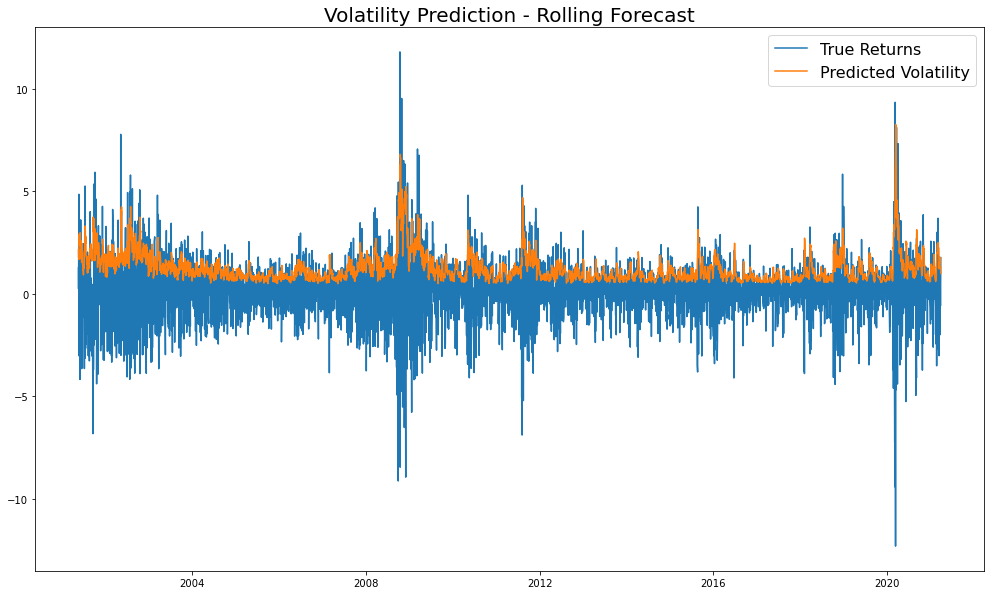

In [238]:
plt.figure(figsize=(17,10))
true, = plt.plot(SYMreturns[-5000:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [235]:
train = SYMreturns
model = arch_model(train, vol = 'HARCH', p = 5, q = 5, mean = "constant", dist = "Normal")
model_fit = model.fit(disp='off')

In [236]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

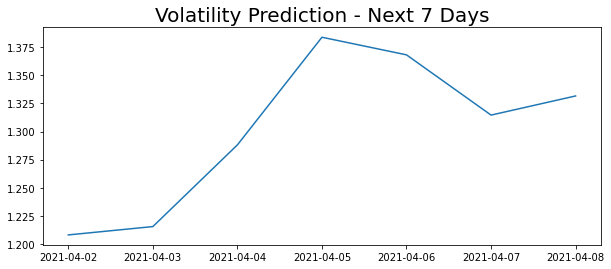

In [237]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)